# Regresión Lineal I. EDA

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest
import warnings
warnings.filterwarnings('ignore')

1. Buscar un conjunto de datos a analizar:

In [2]:
df = pd.read_csv("../data/sephora.csv")
df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0


Después de ver la información de las columnas, hemos decidido que la variable respuesta sea 'price'. La variable independiente va a ser el resto de columnas, Por tanto, queremos ver si el precio varía en función del resto de variables que hay en nuestro DataFrame. 

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente

Este dataset tiene las siguientes variables:

- `id`: El ID del producto en la página web de Sephora.

- `brand`: La marca del producto.

- `category`: La categoría del producto.

- `name`: El nombre del producto.

- `size`: El tamaño del producto.

- `rating`: La valoración del producto.

- `number_of_reviews`: El número de reseñas del producto.

- `love`: El número de personas a las que le gusta el producto.

- `price`: El precio del producto.

- `value_price`: El precio de valor del producto (para productos con descuento).

- `URL`: El link al producto.

- `MarketingFlags`: Si el producto es exclusivo o únicamente vendido online.

- `MarketingFlags_content`: Especificaciones acerca de MarketingFlags.

- `options`: Las opciones disponibles en la web para cada producto, como colores o tamaño.

- `details`: Los detalles del producto disponibles en la web.

- `how_to_use`: Intrucciones de uso para el producto.

- `ingredients`: Ingredientes del producto.

- `online_only`: Si el producto se vende exclusivamente online.

- `exclusive`: Si el producto se vende únicamente en la web de Sephora.

- `limited_edition`: Si el producto es edición limitada.

- `limited_time_offer`: Si el producto tiene una oferta por tiempo limitado

In [3]:
# Miramos la forma de nuestro DataFrame.

print(f"Nuestro DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

Nuestro DataFrame tiene 9168 filas y 21 columnas.


In [4]:
# Sacamos la información de nuestro DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [5]:
# Sacamos los nombres de nuestras columnas.

df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [6]:
# Sacamos los principales estadísticos de las variables numéricas nuestro DataFrame.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9168.0,1.962952e+06,385971.360901,50.0,1819453.0,2072353.5,2230591.0,2359685.0
rating,9168.0,3.990020e+00,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,2.821392e+02,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,1.627859e+04,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,5.006324e+01,47.164989,2.0,24.0,35.0,59.0,549.0
value_price,9168.0,5.182359e+01,49.459020,2.0,25.0,35.0,60.0,549.0
online_only,9168.0,2.348386e-01,0.423921,0.0,0.0,0.0,0.0,1.0
exclusive,9168.0,2.647251e-01,0.441211,0.0,0.0,0.0,1.0,1.0
limited_edition,9168.0,9.184119e-02,0.288817,0.0,0.0,0.0,0.0,1.0
limited_time_offer,9168.0,3.272251e-04,0.018087,0.0,0.0,0.0,0.0,1.0


In [7]:
# Sacamos los principales estadísticos de las variables categóricas nuestro DataFrame.

df.describe(include = "O").T

,count,unique,top,freq
brand,9168,324,SEPHORA COLLECTION,496
category,9168,143,Perfume,665
name,9168,9106,Blush,4
size,9168,1623,no size,3161
URL,9168,9168,https://www.sephora.com/product/blu-mediterran...,1
MarketingFlags_content,9168,10,0,4786
options,9168,564,no options,8377
details,9168,8839,no details,14
how_to_use,9168,6497,no instructions,1573
ingredients,9168,6962,unknown,1630


In [8]:
# Vemos los nulos que tenemos en nuestro DataFrame:
# Como no tenemos nulos, no tenemos que imputarlos.

df.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [9]:
# Vemos si tenemos duplicados en nuestro DataFrame:
# Tampoco tenemos duplicados, por lo que no tenemos que hacer nada con ellos.

df.duplicated().sum()

0

In [10]:
# Creamos un DataFrame únicamente con las variables numéricas para poder trabajar con ellas.

numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,4.0,4,3002,66.0,75.0,1,0,0,0
1,2044816,4.5,76,2700,66.0,66.0,1,0,0,0


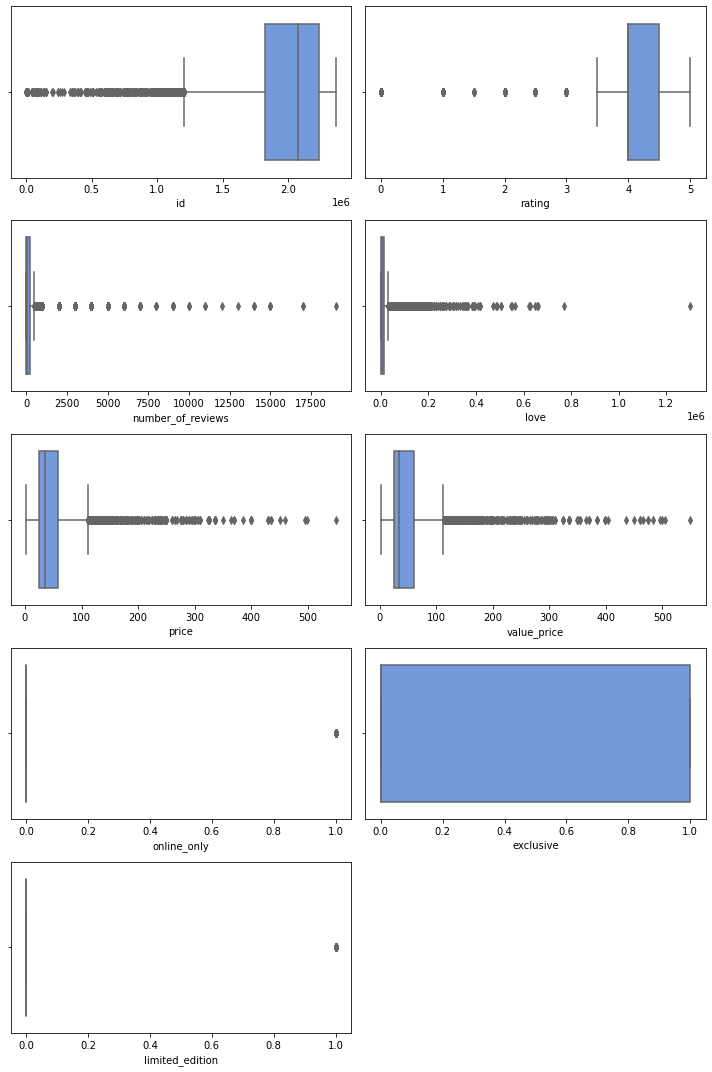

In [11]:
# Sacamos un boxplot para ver los outliers de nuestras variables numéricas.

fig, axes = plt.subplots(5, 2, figsize=(10,15))

axes = axes.flat 

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "cornflowerblue"); 
    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Hemos realizado boxplots para todas las variables numéricas y poder observar cuáles de ellas tienen outliers. 

- ID: Es normal que tenga outliers, porque simplemente es un número identificatorio. 

- Rating: Creemos que, realmente, es una variable categórica, porque los valores van desde el 0 hasta el 5. Aún así, se puede observar que la mayoría de los productos tiene una valoración de 3.5 a 5. 

- number_of_reviews: La mayoría de productos no tienen muchas valoraciones o incluso ninguna. No obstante, hay muchos outliers. 

- love: También hay muchos outliers, pero dependerá mucho de cada producto. 

- price: La mayoría de productos se encuentran entre 0 y 100, pero también hay muchos outliers, pero esto es lógico, ya que Sephora vende productos caros, y puede vender colonias muy caras de lujo que cuyo precio varía mucho comparado con productos individuales de marcas más baratas. 

- value_price: Igual que precio. 

- online_only, exclusive y limited_edition: Son variables categóricas.

In [12]:
numericas.shape

(9168, 10)

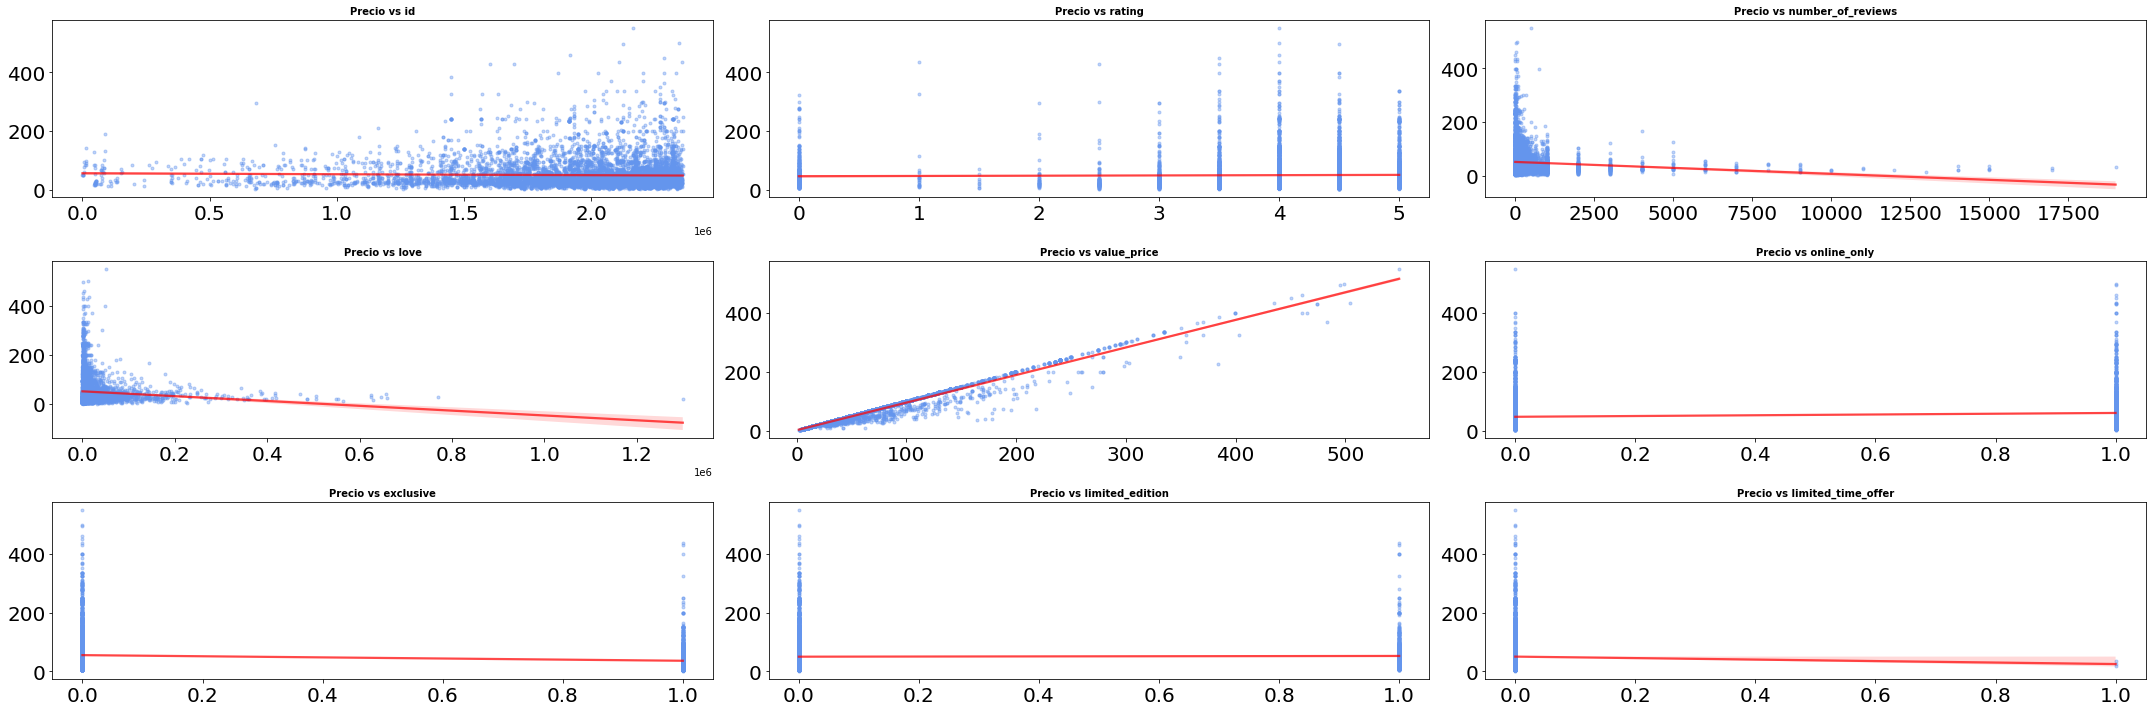

In [13]:
# Sacamos los regplots de las variables numéricas predictoras para ver su relación con la variable respuesta.

fig, axes = plt.subplots(3, 3, figsize = (30, 10))

axes = axes.flat

numericas = numericas.drop("price", axis = 1)

for i, columna in enumerate(numericas):
    sns.regplot(
        x = df[columna], 
        y = df["price"], 
        color = "cornflowerblue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {columna}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

Después de esta exploración inicial, podemos concluir que no tenemos nulos ni duplicados, que hay outliers en todas las columnas numéricas (a excepción de "online_only"). No obstante, hemos visto que hay falsas numéricas, como "online_only", "limited_edition", "limited_time_offer" y "exclusive", y vamos a proceder a categorizarlas para poder trabajar mejor con estos datos. En cuanto al resto de variables, decidimos no tratar los outliers, porque consideramos que pueden ser normales en este contexto. Por ejemplo, un producto puede tener muchísimas reviews y mucha gente a la que le guste por ser popular. 

Sacamos los únicos de las columnas a categorizar:

In [14]:
df["online_only"].unique()

array([1, 0])

In [15]:
df["limited_edition"].unique()

array([0, 1])

In [16]:
df["limited_time_offer"].unique()

array([0, 1])

In [17]:
df["exclusive"].unique()

array([0, 1])

In [18]:
# Creamos una lista con las columnas: 

columnas_cat = ["online_only", "limited_edition", "limited_time_offer", "exclusive"]

In [19]:
# Aplicamos una lambda para cambiar los 1 y 0 por "Yes" y "No" para que sea más sencillo trabajar con ellos y no sea una falsa numérica. 

for columna in columnas_cat: 
    df[columna] = df[columna].apply(lambda elemento : str(elemento).replace("1", "Yes").replace("0", "No"))

Sacamos los únicos de las columnas de "MarketingFlags" y "MarketingFlags_content" para ver su contenido.

In [20]:
df["MarketingFlags"].unique()

array([ True, False])

In [21]:
# Comprobamos que ambas columnas tienen la misma información que otras columnas del DataFrame, por lo que decidimos borrar ambas.

df["MarketingFlags_content"].unique()

array(['online only', 'exclusive · online only', '0',
       'limited edition · exclusive · online only',
       'limited edition · online only', 'exclusive',
       'limited edition · exclusive', 'limited edition',
       'limited time offer',
       'limited time offer · limited edition · exclusive'], dtype=object)

In [22]:
# Borramos columnas con las que no vamos a trabajar.

df.drop(["MarketingFlags", "MarketingFlags_content", "id", "URL", "name", "size", "options", "details", "how_to_use", "ingredients"], axis = 1, inplace = True)
df.head(1)

,brand,category,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,4.0,4,3002,66.0,75.0,Yes,No,No,No


In [23]:
# Decidimos filtrar por perfumes y colonias para tener un menor número de categorías y de marcas.

df = df[df["category"].str.contains("Cologne|Perfume|Fragrance", case = False)]

In [24]:
print(f"Nuestro DataFrame ahora tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

Nuestro DataFrame ahora tiene 991 filas y 11 columnas.


In [25]:
df.head(1)

,brand,category,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,4.0,4,3002,66.0,75.0,Yes,No,No,No


In [26]:
# Reseteamos el index de nuestro dataframe, ya que al filtrar éste ya no es seguido, lo que nos podría generar nulos en el futuro.

df = df.reset_index()
df.drop("index", axis = 1, inplace = True) # Eliminamos la columna de index que se genera. 

In [27]:
df.index #Comprobamos que los índices están bien. 

RangeIndex(start=0, stop=991, step=1)

In [28]:
# Guardamos el dataframe
df.to_csv("../data/sephora2.csv")

# Regresión lineal II. Tests Estadísticos

1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

Nuestra hipótesis nula (H0) es que el precio no cambia.
Nuestra hipótesis alternativa es que el precio sí cambia.

Error de tipo I -> Falso positivo, es decir, el precio sí cambia cuando en realidad no lo hace. Este el error que preferimos como clientes.

Error de tipo II -> Falso negativo, es decir, el precio no cambia cuando en realidad sí lo hace. Este el error que preferimos como empresa.

2. ¿Qué es la asimetría?

La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media.

3. ¿Es vuestra variable respuesta asimétrica?

In [29]:
# Nuestra variable respuesta es asimétrica positiva, por lo que nuestros datos no son normales. 

skew(df["price"])

1.4086070771518424

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [30]:
# Nuestro p-value es casi de 0.0, por lo que es de tipo mesocúrtica, es decir, tiene una morfología redondeada. 

kurtosistest(df["price"]) 

KurtosistestResult(statistic=8.511893868093086, pvalue=1.7111516885843066e-17)

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [31]:
# Nuestro p-value es 0.0, lo que significa que no podemos aceptar la H0 y, por tanto nuestros datos no son normales. 

kstest(df["price"], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

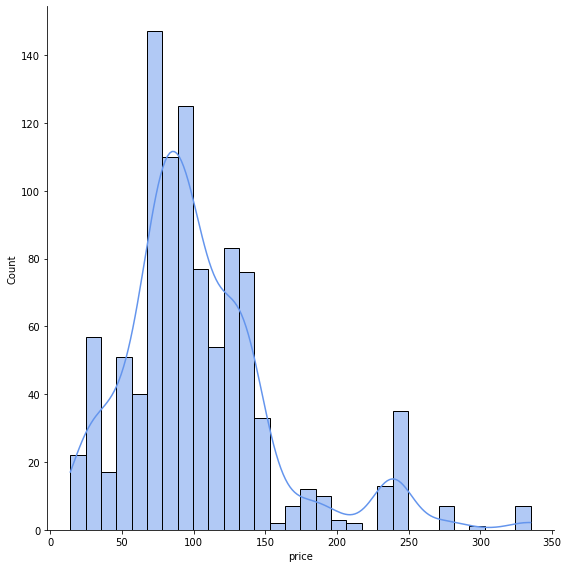

In [32]:
ax = sns.displot(df["price"], kde = True, color = "cornflowerblue", height = 8)

Como conclusión, como se puede observar en la gráfica, nuestros datos no son normales porque no se ajustan a un tipo de distribución de campana de Gauss.